# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [205]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [206]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [207]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Stella\Miniconda3\envs\py3k\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


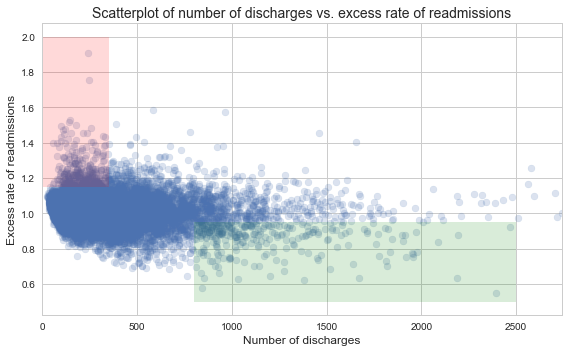

In [208]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [209]:
# Your turn
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [210]:
#taking a preliminary look at the data
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


A.
Overall it is difficult to make judgements on just the graph alone but from the graph it does appear that rate of               readmissions trends down with an increase number of discharges.  So a lower number of discharges appears to correlate with an increased rate of readmission and a higher number of discharges correlates with lower rates of readmissions.

B.
Although in the graph it does appear that hospitals with <100 number of discharges falls around the 1% rate of readmissions and a good mount at above 1% I am unable to accurately see what the mean would be.  The same goes for hospitals with <1000 discharges.

C.
There does appear to be a correlation with smaller hospitals having higher readmission rates but I am not able to determine from the graph if this is due to smaller hospitals lacking the necessary resources to prevent complications in patients and causing them to be readmitted.

D.
Before any recommendatins can be made it would be necessary to take a closer look at the data to see if there are possibly other factors here that could be causing higher readmission rates. 


In [211]:
#drop all columns with NaN values in number of discharges column and excess readmission ratio column
noNull_hospital_read_df = clean_hospital_read_df.dropna(subset = ['Number of Discharges','Excess Readmission Ratio'])
noNull_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [212]:
#create new dataframe including only the two columns that will be used
df = noNull_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
df.columns = ['Num of Discharges', 'Excess Readmit Ratio']
df.reset_index(drop=True)
df.head()

,Num of Discharges,Excess Readmit Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


In [213]:
df.describe()

,Num of Discharges,Excess Readmit Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Num of Discharges       11497 non-null int32
Excess Readmit Ratio    11497 non-null float64
dtypes: float64(1), int32(1)
memory usage: 224.6 KB


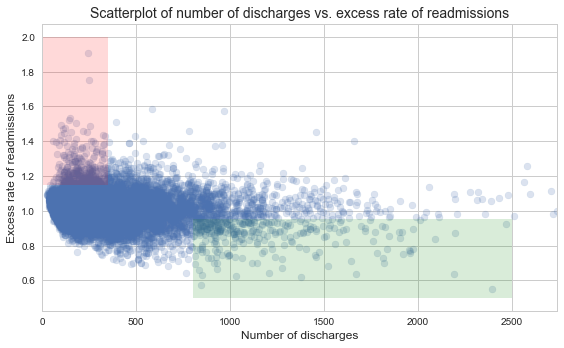

In [256]:
# generate a new scatterplot for number of discharges vs. excess rate of readmissions where NaN's are dropped
# lists work better with matplotlib scatterplot function
x1 = [a for a in df['Num of Discharges'][81:-3]]
y1 = list(df['Excess Readmit Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()


Means and percentage rates of Excess Readmit Ratio for original data: 

Mean of Excess Readmission Rate for small hospitals:  1.02
Percentage of excess readmission rate > one for small hospitals:  0.59 

Mean of Excess Readmission Rate for large hospitals:  0.98
Percentage of excess readmission rate > one for large hospitals:  0.44 

Means and percentage rates of Excess Readmit Ratio for data after dropping NaNs from Number of Discharges column 
and Excess Readmin Ratio column: 

Mean of Excess Readmission Rate for small hospitals:  1.02
Percentage of excess readmission rate > one for small hospitals:  0.63 

Mean of Excess Readmission Rate for large hospitals:  0.98
Percentage of excess readmission rate > one for large hospitals:  0.44 



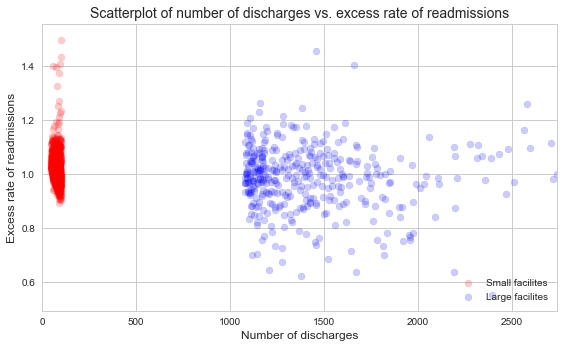

In [263]:
print('Means and percentage rates of Excess Readmit Ratio for original data: \n')

##compute the means of excess readmission ration for small and large hospitals
small_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]
small_ratio_mean = np.mean(small_hospitals['Excess Readmission Ratio'])

large_hospitals = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
large_ratio_mean = np.mean(large_hospitals['Excess Readmission Ratio'])

#compute rate of readmissions greater than one for small and large hospitals
small_rate_gtone = len(small_hospitals[small_hospitals['Excess Readmission Ratio'] > 1]) / len(small_hospitals)

large_rate_gtone = len(large_hospitals[large_hospitals['Excess Readmission Ratio'] > 1]) / len(large_hospitals)

print('Mean of Excess Readmission Rate for small hospitals: ', round(small_ratio_mean,2))
print('Percentage of excess readmission rate > one for small hospitals: ', round(small_rate_gtone, 2),'\n')

print('Mean of Excess Readmission Rate for large hospitals: ', round(large_ratio_mean, 2))
print('Percentage of excess readmission rate > one for large hospitals: ', round(large_rate_gtone, 2), '\n')

print('Means and percentage rates of Excess Readmit Ratio for data after dropping NaN''s from Number of Discharges column',
      '\nand Excess Readmin Ratio column: \n')

##compute the means of excess readmission ration for small and large hospitals
small_hospitals = df[df['Num of Discharges'] < 100]
small_ratio_mean = np.mean(small_hospitals['Excess Readmit Ratio'])

large_hospitals = df[df['Num of Discharges'] > 1000]
large_ratio_mean = np.mean(large_hospitals['Excess Readmit Ratio'])

#compute rate of readmissions greater than one for small and large hospitals
small_rate_gtone = len(small_hospitals[small_hospitals['Excess Readmit Ratio'] > 1]) / len(small_hospitals)

large_rate_gtone = len(large_hospitals[large_hospitals['Excess Readmit Ratio'] > 1]) / len(large_hospitals)

print('Mean of Excess Readmission Rate for small hospitals: ', round(small_ratio_mean,2))
print('Percentage of excess readmission rate > one for small hospitals: ', round(small_rate_gtone, 2),'\n')

print('Mean of Excess Readmission Rate for large hospitals: ', round(large_ratio_mean, 2))
print('Percentage of excess readmission rate > one for large hospitals: ', round(large_rate_gtone, 2),'\n')


# generate a new scatterplot for number of discharges vs. excess rate of readmissions where NaN's are dropped
# lists work better with matplotlib scatterplot function
x2 = [a for a in small_hospitals['Num of Discharges'][81:-3]]
y2 = list(small_hospitals['Excess Readmit Ratio'][81:-3])

x3 = [a for a in large_hospitals['Num of Discharges'][81:-3]]
y3 = list(large_hospitals['Excess Readmit Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x2, y2, alpha=0.2, color='red')
ax.scatter(x3, y3, alpha=0.2, color='blue')

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

# Add legend
ax.legend(('Small facilites', 'Large facilites'), loc='lower right')



For this example we will use a hypothesis test of correlation:

Null Hypothes: There is no correlation between number of discharges and excess rate of readmission
Alternate Hypothesis: There is a correlation between number of discharges and excess rate or readmission

Below we calculated the P-value for the frequentist approach and also using the bootstrap approach.  Both P-values were below our statistical significance value of .01 so we must reject the null hypothesis that there is no correlation between number of discharges and excess rates of readmission. 

We must also note that for both the frequentist approach and for the bootstrap approach we received a negative Pearson correlation Coefficient (r).  This shows us that from the data collected there is a negative correlation between number of discharges and excess rate of readmissions.  As one value increases the other decreases.  


In [217]:
##B2. Compute and report the observed significance value (or p-value).

#function to resample the data
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

#function to create bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] =bootstrap_replicate_1d(data,func)
    return bs_replicates

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

print("Frequentist approach\n")

# Compute observed Pearson correlation coefficient 
r = pearson_r(x1, y1)

# Print the result
print("Pearson correlation coefficient: ",r)

#the formula for test statistic is (r * √(n-2))/ √(1-r**2)
n = len(df)
t_stat = (r * np.sqrt(n-2))/np.sqrt(1-r**2)
p_value = stats.t.cdf(x=t_stat, df = n-2) * 2

print("t_stat: ", t_stat)
print("P-Value: ", p_value)

#using bootstrap approach
print("\nUsing Bootstrap Approach\n")

# Compute the difference
diff_means = np.mean(x1) - np.mean(y1)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((x1,y1)))

# Generate shifted data sets
discharges_shifted = x1 - np.mean(x1) + mean_count
readmits_shifted = y1- np.mean(y1) + mean_count

# Generate bootstrap replicates
bs_reps_discharges = draw_bs_reps(discharges_shifted,
                       np.mean, size=10000)
bs_reps_readmits = draw_bs_reps(readmits_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means for each trial of replicates
bs_replicates = bs_reps_discharges - bs_reps_readmits

mean_diff = np.mean(bs_reps_discharges) - np.mean(bs_reps_readmits)

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(x1) - np.mean(y1)) \
            / len(bs_replicates)

print('p-value =', p)

#Compute Pearson correlation coefficient for bootstrap replicates
bs_r =r - np.mean(bs_replicates)

print("Pearson correlation coeffcient: ", bs_r)


Frequentist approach

Pearson correlation coefficient:  -0.09309554287590442
t_stat:  -10.02474990445875
P-Value:  1.4825983560465644e-23

Using Bootstrap Approach

p-value = 0.0
Pearson correlation coeffcient:  -0.09197615738085999


5.  Our data is statistically significant since both or our P-values were below .01 to where we can reject the null hypothesis       and cannot not assume that there is no correlation between Number of Discharges and Excess Readmission Ratios.  However         from the data we also cannot assume that the issue is due to smaller facilities lacking equipment necessary to perform the     proper procedures.  That may be a factor but it may not be the only factor.

    To make a practical recommendation more data will need to be examined and a closer look at the facilities with a higher         ratio of radmissions should be looked at before justifying the cost of purchasing equpment and reducing readmissions.  Some     other items to look at could be amount of staff, experience of staff in certain procedures, etc. It also may be helpful to     take a look at patient data, such as age of patients, type of insurance, etc.
    
    From the plot provided at the beginning of the exercise it is hard to make a calculation of mean and percentage of rates of     readmission.  There is a large section where the marks on the plot are overlapping together.
    
    The joint plot below shows the line of regression which we can clearly see as number of dishcarges goes down. The joint         plog will also calculate p-value and pearson correlation coefficient to clearly see that there is a negative correlation       between number of discharges and Excess rates of readmission. 

C:\Users\Stella\Miniconda3\envs\py3k\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Stella\Miniconda3\envs\py3k\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Stella\Miniconda3\envs\py3k\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


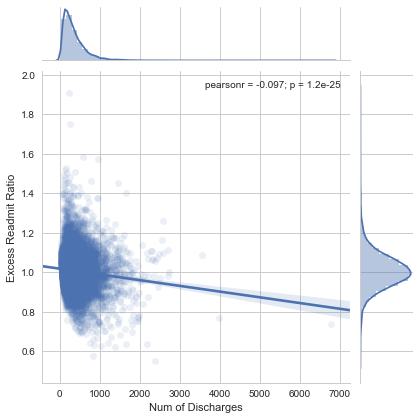

In [254]:
#plot jointplot
_ = sns.jointplot(df['Num of Discharges'], df['Excess Readmit Ratio'], data=df, kind = 'reg', scatter_kws = {'alpha' : 0.1})
plt.show()
